# Example of using Xarray Accessor for ROMS

### Importing the libraries

In [1]:
import xroms

In [2]:
import xarray as xr

In [ ]:
import numpy as np

### Loading the ROMS output files and the grid

Load all the daily output averages in a Xarray Dataset

In [3]:
ds = xr.open_mfdataset('/data/ecutolo/WMOP_OUTPUTS/WMOPv3.0_nesting/roms_WMOP_FORECAST_201805*_avg.nc')

load the grid file to proper compute the vertical coordinate

In [4]:
ds.xroms.load_grid('/data/ecutolo/WMOP_GRIDS/roms_grd_WMOPv3.0_new.nc')

Grid Data Loaded


### Play with  the dataset

Now I have the full dataset with also the variables related to the grid

In [5]:
vort = ds.xroms.compute_vorticity()

I can create anothe dataset making a temporal average and also computing a zeta slice at 200m depth

In [6]:
ds_200slice = ds.mean('ocean_time').xroms.sel_zslice(-20)

/data/ecutolo/anaconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/data/ecutolo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/ecutolo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


see how the <i>ocean_time</i> coordinate and <i>s_rho</i> one have disapeared

in facts now I can directly plot some variables

In [7]:
ds_200slice.salt.plot()

and I can also select just a geographic region (lonmin,lonmax,latmin,latmax)

In [8]:
area_limits = (-5.8, 0, 34.9, 37.8)

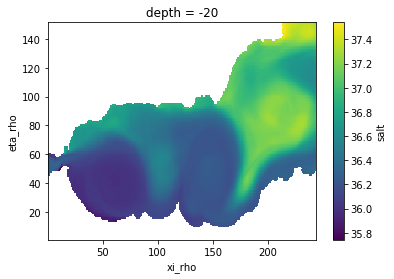

In [9]:
ds_200slice.xroms.sel_geographic_area(area_limits).salt.plot()

In [10]:
ds_200slice_alboran = ds_200slice.xroms.sel_geographic_area(area_limits)

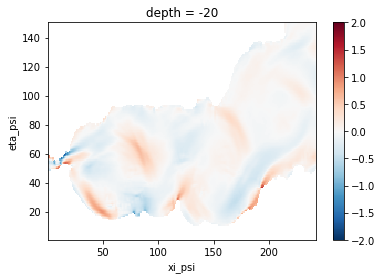

In [11]:
ds_200slice_alboran.xroms.compute_vorticity().plot(vmax=2)

In [13]:
import matplotlib.pyplot as plt

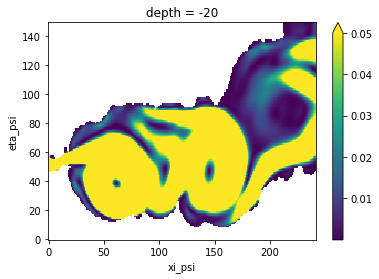

In [14]:
(ds_200slice_alboran.u.xroms.move2grid('psi')**2+ds_200slice_alboran.v.xroms.move2grid('psi')**2).plot(vmax=0.05)

In [ ]:
plt.streamplot(ds_200slice.lon_psi.values,
               ds_200slice.lat_psi.values,
               ds_200slice.u.xroms.move2grid('psi').values,
               ds_200slice.v.xroms.move2grid('psi').values)